# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from statistics import mean
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

Citipy - is useful in this application because we are generating random coordinates (Lat, Lng) which are fed into citipy.  Citipy then returns the nearest city to those geo coordinates.

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
t_city=[]
lat_city=[]
lng_city=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]
units="imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    weather_response = requests.get(query_url).json()
# Condition inserted to skip over cities which are not found.
    if (weather_response['cod']=='404'):
        print(f"City not found City name: {city}")
    else:
        print(f"Processing city id: {weather_response['id']} city name: {weather_response['name']}")
        t_city.append(weather_response['name'])
        lat_city.append(weather_response['coord']['lat'])
        lng_city.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
print(f"---------------------------------------------------------------------------")
print(f"Processing completed....")

Processing city id: 1714733 city name: Dingle
City not found City name: sentyabrskiy
Processing city id: 6111862 city name: Port Hardy
Processing city id: 1282256 city name: Hithadhoo
Processing city id: 3386213 city name: Touros
Processing city id: 1071296 city name: Antalaha
Processing city id: 520552 city name: Nizhniy Odes
Processing city id: 176758 city name: Kaputa
Processing city id: 2015306 city name: Tiksi
Processing city id: 2685750 city name: Östersund
Processing city id: 3988265 city name: Sahuaripa
Processing city id: 2020824 city name: Lermontovka
Processing city id: 5134295 city name: Rome
Processing city id: 3833367 city name: Ushuaia
Processing city id: 2152659 city name: Port Macquarie
Processing city id: 2094027 city name: Kieta
Processing city id: 6096551 city name: Pangnirtung
Processing city id: 1106677 city name: Bambous Virieux
Processing city id: 5880054 city name: Barrow
Processing city id: 2070998 city name: Geraldton
Processing city id: 2206939 city name: Bl

Processing city id: 5445820 city name: Liberal
City not found City name: higuey
Processing city id: 1529484 city name: Kumul
Processing city id: 3355672 city name: Lüderitz
Processing city id: 3423146 city name: Ilulissat
Processing city id: 3465373 city name: Correntina
Processing city id: 3393536 city name: Olinda
Processing city id: 6301965 city name: Howard Springs
Processing city id: 2537763 city name: Salé
Processing city id: 5882953 city name: Aklavik
Processing city id: 780687 city name: Berlevåg
Processing city id: 935214 city name: Saint-Pierre
Processing city id: 2055868 city name: Yantal'
Processing city id: 2273435 city name: Tubmanburg
City not found City name: mys shmidta
Processing city id: 1817240 city name: Baiyin
Processing city id: 3471451 city name: Arraial do Cabo
Processing city id: 2446796 city name: Bilma
City not found City name: saleaula
Processing city id: 463355 city name: Zheleznodorozhnyy
Processing city id: 493405 city name: Shumyachi
Processing city id:

Processing city id: 2121025 city name: Srednekolymsk
Processing city id: 2063036 city name: Port Lincoln
Processing city id: 6104745 city name: Pilot Butte
Processing city id: 4513583 city name: Hamilton
Processing city id: 2025456 city name: Chernyshevskiy
Processing city id: 2136150 city name: Luganville
Processing city id: 1509844 city name: Boguchany
Processing city id: 492860 city name: Sindor
Processing city id: 1490796 city name: Strezhevoy
Processing city id: 5838199 city name: Sheridan
City not found City name: chagda
Processing city id: 3420846 city name: Qaqortoq
Processing city id: 2962840 city name: Longford
City not found City name: ziyamet
Processing city id: 2062276 city name: Roebourne
Processing city id: 5969025 city name: Haines Junction
Processing city id: 904422 city name: Mumbwa
Processing city id: 1513087 city name: Nurota
Processing city id: 523392 city name: Naryan-Mar
Processing city id: 1337617 city name: Muli
City not found City name: inderborskiy
Processing

Processing city id: 4978701 city name: Skowhegan
Processing city id: 133964 city name: Garmsār
Processing city id: 3388760 city name: São Geraldo do Araguaia
Processing city id: 1521762 city name: Kurchum
Processing city id: 3577430 city name: Road Town
Processing city id: 1507636 city name: Chunskiy
Processing city id: 543396 city name: Koygorodok
Processing city id: 2068655 city name: Katherine
Processing city id: 2125693 city name: Evensk
Processing city id: 1737486 city name: Bintulu
Processing city id: 4004293 city name: Ixtapa
Processing city id: 1337610 city name: Thinadhoo
Processing city id: 1789065 city name: Ankang
City not found City name: tumannyy
Processing city id: 57000 city name: Hobyo
Processing city id: 1517637 city name: Ushtobe
Processing city id: 5554428 city name: Ketchikan
Processing city id: 142255 city name: Bāfq
Processing city id: 5849996 city name: Lahaina
Processing city id: 2130203 city name: Hachinohe
Processing city id: 3463124 city name: Formosa do Rio

## Convert Raw Data to DataFrame
* Save as csv

In [5]:
weather_info=pd.DataFrame({
            'City':t_city,
            'Lat':lat_city,
            'Lng':lng_city,
            'Max Temp':max_temp,
            'Humidity':humidity,
            'Cloudiness':cloudiness,
            'Wind Speed':wind_speed,
            'Country':country,
            'Date':date
})
weather_info.to_csv(output_data_file, index=False, header=True)

In [6]:
weather_info.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dingle,11.0,122.67,76.78,88,40,3.91,PH,1602941048
1,Port Hardy,50.7,-127.42,46.40,87,5,8.05,CA,1602941048
2,Hithadhoo,-0.6,73.08,83.91,75,99,18.86,MV,1602940870
3,Touros,-5.2,-35.46,87.80,52,75,18.34,BR,1602941048
4,Antalaha,-14.9,50.28,78.76,62,0,11.41,MG,1602941048


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

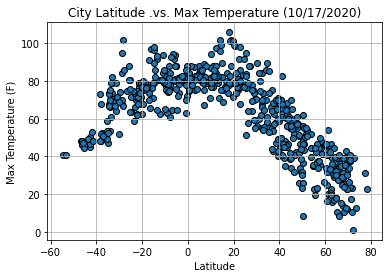

In [8]:
x_values=weather_info['Lat']
y_values=weather_info['Max Temp']
date=time.strftime("%m/%d/%Y")
plt.scatter(x_values,y_values,edgecolor='black')
plt.title("City Latitude .vs. Max Temperature (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("../output_data/Latitude.vs.Temperature.png")
plt.show()

This above plot shows the how the tempurate decreases the further you get away from the equator 0 degrees latitude.  This scatter plot show the dataset used leans towards the northern hemisphere. 

### Latitude vs. Humidity Plot

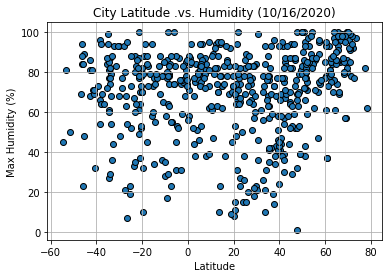

In [25]:
x_values=weather_info['Lat']
y_values=weather_info['Humidity']
date=time.strftime("%m/%d/%Y")
plt.scatter(x_values,y_values,edgecolor='black')
plt.title("City Latitude .vs. Humidity (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Humidity (%)")
plt.grid()
plt.savefig("../output_data/Latitude.vs.Humidity.png")
plt.show()

In this scatter plot the majority of cities have a humidity factor of 60% or greater. Also this particular dataset, most of the cities are in the northern hemisphere..

### Latitude vs. Cloudiness Plot

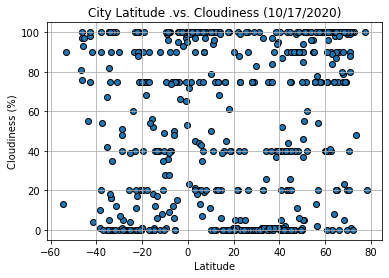

In [9]:
x_values=weather_info['Lat']
y_values=weather_info['Cloudiness']
date=time.strftime("%m/%d/%Y")
plt.scatter(x_values,y_values,edgecolor='black')
plt.title("City Latitude .vs. Cloudiness (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("../output_data/Latitude.vs.Cloudiness.png")
plt.show()

This scatter plot shows the majority of the cities either have 0 % Cloudiness or 80-100% Cloudiness.  The northern latitudes show a greater amount of datapoints in this dataset.

### Latitude vs. Wind Speed Plot

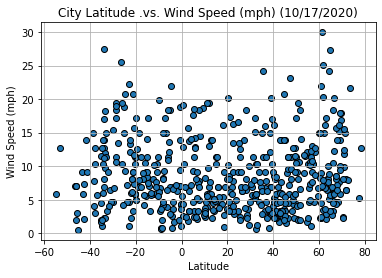

In [10]:
x_values=weather_info['Lat']
y_values=weather_info['Wind Speed']
date=time.strftime("%m/%d/%Y")
plt.scatter(x_values,y_values,edgecolor='black')
plt.title("City Latitude .vs. Wind Speed (mph) (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("../output_data/Latitude.vs.Wind_Speed.png")
plt.show()

## Linear Regression

### Write linear regression plot function (optional)

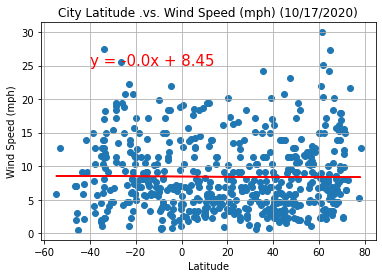

In [11]:
def slope_intercept(xlist,ylist):
    mean_of_x=mean(xlist)
    mean_of_y=mean(ylist)
    
    slope=(((mean_of_x * mean_of_y) - mean(xlist * ylist)) /
          (((mean_of_x)**2) - (mean(xlist**2))))
           
    intercept=mean_of_y - (slope*mean_of_x)
    
    return slope, intercept

#Call lregression function which returns slope and intercept
slope, intercept = slope_intercept(weather_info['Lat'],weather_info['Wind Speed'])          

#Calculate regression line
# formula is y=(slope*x)+intercept
regline=[(slope*x)+intercept for x in weather_info['Lat']]
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))           
plt.scatter(weather_info['Lat'],weather_info['Wind Speed'])
plt.plot(weather_info['Lat'],regline,"r-")
plt.annotate(line_eq,(-40,25),fontsize=15,color="red")
plt.title("City Latitude .vs. Wind Speed (mph) (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("../output_data/City_Latitude.vs.Wind_Speed.png")
plt.show()

I wrote a slope intercept function which returns the slope and intercept of a given dataset. The scatter plot shows the majority of the cities to have wind speeds 10 mph or less.  The line regression, though slight shows the wind speeds are greater as you go north. But also shows the dataset is not evenly distributed. 

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The rvalue is: 0.7732097270657488


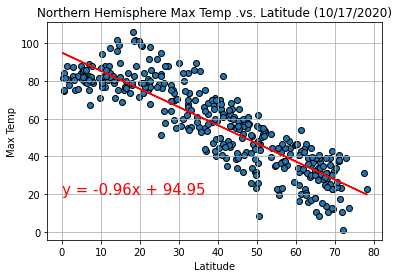

In [12]:
equatorlat=0
nh_weather_info=weather_info.loc[weather_info['Lat']>=equatorlat,:]
x_values=nh_weather_info['Lat']
y_values=nh_weather_info['Max Temp']
date=time.strftime("%m/%d/%Y")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.title("Northern Hemisphere Max Temp .vs. Latitude (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid()
print(f"The rvalue is: {rvalue**2}")
plt.savefig("../output_data/NH Max Temp.vs.Latitude.png")
plt.show()

This scatter plot shows a strong correlation between tempurature and latitude with a high r^2 value for the northern hemisphere. The further north you go the colder the tempurature is.

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The rvalue is: 0.4394779257064966


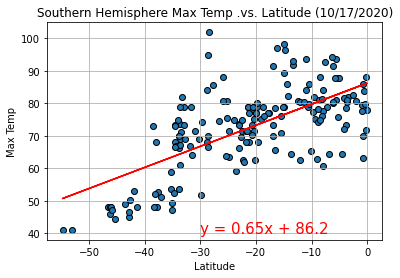

In [13]:
equatorlat=0
sh_weather_info=weather_info.loc[weather_info['Lat']<equatorlat,:]
x_values=sh_weather_info['Lat']
y_values=sh_weather_info['Max Temp']
date=time.strftime("%m/%d/%Y")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.title("Southern Hemisphere Max Temp .vs. Latitude (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid()
print(f"The rvalue is: {rvalue**2}")
plt.savefig("../output_data/SH Max Temp.vs.Latitude.png")
plt.show()

This scatter plot contains less datapoints, showing the correlation between tempurature and latitude.  The R^2 value shows that correlation.  Obviously the further south you go the cooler it becomes.  One interesting observation is that the datapoints seem to be not packed as tightly as they were in the Northern Hemisphere.  

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The rvalue is: 0.06434000375788977


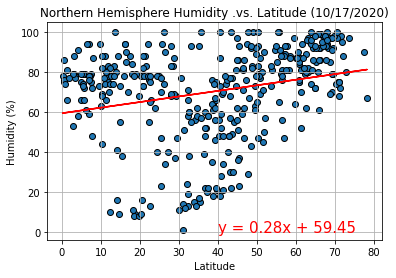

In [14]:
equatorlat=0
nh_weather_info=weather_info.loc[weather_info['Lat']>=equatorlat,:]
x_values=nh_weather_info['Lat']
y_values=nh_weather_info['Humidity']
date=time.strftime("%m/%d/%Y")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,0),fontsize=15,color="red")
plt.title("Northern Hemisphere Humidity .vs. Latitude (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
print(f"The rvalue is: {rvalue**2}")
plt.savefig("../output_data/NH Humidity.vs.Latitude.png")
plt.show()

The humidity in the northern hemisphere seems to increase the further north you go.  But the r^2 value is low which says that the humidity and latitude are not closely related in this scatterplot.

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The rvalue is: 0.003182305625101699


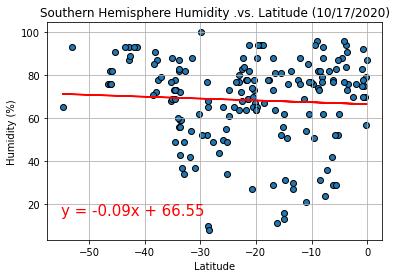

In [15]:
equatorlat=0
sh_weather_info=weather_info.loc[weather_info['Lat']<equatorlat,:]
x_values=sh_weather_info['Lat']
y_values=sh_weather_info['Humidity']
date=time.strftime("%m/%d/%Y")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.title("Southern Hemisphere Humidity .vs. Latitude (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
print(f"The rvalue is: {rvalue**2}")
plt.savefig("../output_data/SH Humidity.vs.Latitude.png")
plt.show()

The southern hemisphere seems to show less of an increase in humidity the further south you go.  The r^2 value is very low which shows that Humidity and Latitude almost have no correlation in this scatterplot.

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The rvalue is: 0.0307321972215218


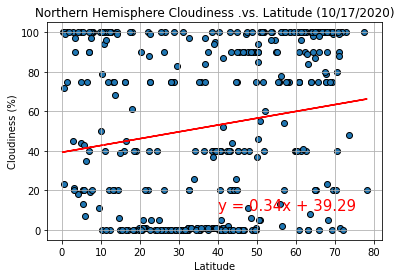

In [16]:
equatorlat=0
nh_weather_info=weather_info.loc[weather_info['Lat']>=equatorlat,:]
x_values=nh_weather_info['Lat']
y_values=nh_weather_info['Cloudiness']
date=time.strftime("%m/%d/%Y")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.title("Northern Hemisphere Cloudiness .vs. Latitude (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
print(f"The rvalue is: {rvalue**2}")
plt.savefig("../output_data/NH Cloudiness.vs.Latitude.png")
plt.show()

The line regression shows an increase in cloudiness the further north you go, but the r^2 value is very low which shows that cloudiness and latitude are not closely related in this scatterplot.

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The rvalue is: 0.009427077578085221


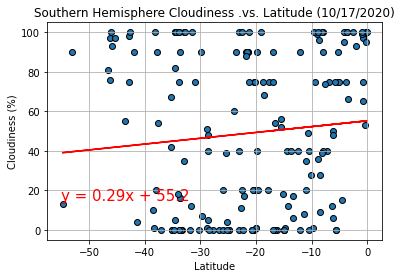

In [17]:
equatorlat=0
sh_weather_info=weather_info.loc[weather_info['Lat']<equatorlat,:]
x_values=sh_weather_info['Lat']
y_values=sh_weather_info['Cloudiness']
date=time.strftime("%m/%d/%Y")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.title("Southern Hemisphere Cloudiness .vs. Latitude (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
print(f"The rvalue is: {rvalue**2}")
plt.savefig("../output_data/SH Cloudiness.vs.Latitude.png")
plt.show()

This scatterplot has an r^2 value is very low which shows that cloudiness and latitude have a very weak correlation here.

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The rvalue is: 0.015729596961032998


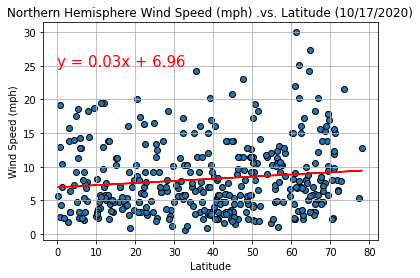

In [19]:
equatorlat=0
nh_weather_info=weather_info.loc[weather_info['Lat']>=equatorlat,:]
x_values=nh_weather_info['Lat']
y_values=nh_weather_info['Wind Speed']
date=time.strftime("%m/%d/%Y")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.title("Northern Hemisphere Wind Speed (mph) .vs. Latitude (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
print(f"The rvalue is: {rvalue**2}")
plt.savefig("../output_data/NH Wind Speed.vs.Latitude.png")
plt.show()

The r^2 value is very low which shows a weak correlation between Wind Speed and Latitude in this scatterplot.

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The rvalue is: 0.0045560820370374126


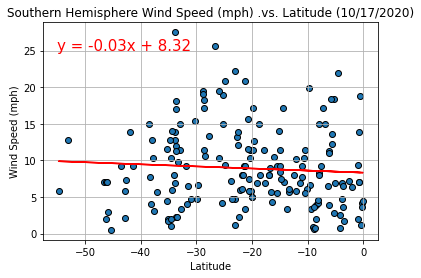

In [20]:
equatorlat=0
sh_weather_info=weather_info.loc[weather_info['Lat']<equatorlat,:]
x_values=sh_weather_info['Lat']
y_values=sh_weather_info['Wind Speed']
date=time.strftime("%m/%d/%Y")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.title("Southern Hemisphere Wind Speed (mph) .vs. Latitude (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
print(f"The rvalue is: {rvalue**2}")
plt.savefig("../output_data/SH Wind Speed.vs.Latitude.png")
plt.show()

The r^2 value is very low which again shows that Wind Speed and Latitude in this scatterplot not to be closely related.

The rvalue is: 0.013264834967875318
The pvalue is: 0.006554275001297592 This is an unnormalized dataset.


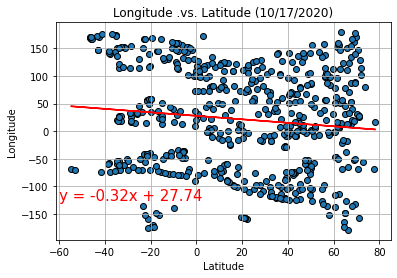

In [21]:
x_values=weather_info['Lat']
y_values=weather_info['Lng']
date=time.strftime("%m/%d/%Y")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-60,-125),fontsize=15,color="red")
plt.title("Longitude .vs. Latitude (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.grid()
print(f"The rvalue is: {rvalue**2}")
if (pvalue<.05):
    distribution="This is an unnormalized dataset."
else:
    distribution="This is a normalized dataset."
print(f"The pvalue is: {pvalue} {distribution}")
plt.savefig("../output_data/Longitude.vs.Latitude.png")
plt.show()

I decided to run a scatterplot Longitude vs Latitude.  The r^2 value is very low which shows that they are not closely related in this graph.  The pvalue is very low as well, which shows that this is an unnormalized dataset.  Just glancing at the graph you notice more datapoints in the northern hemisphere as compared to those that are in the southern hemisphere.